# Simple Classification using Tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Cancer Dataset

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

In [2]:
df = pd.read_csv('cancer_classification.csv')

## 1. Simple Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

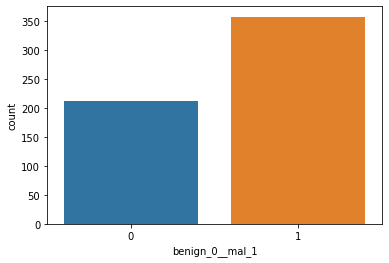

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

#### From the plot we can know that the dataset that we have more cases at malign tumor than the benign, the difference is not that extreme.

<AxesSubplot:>

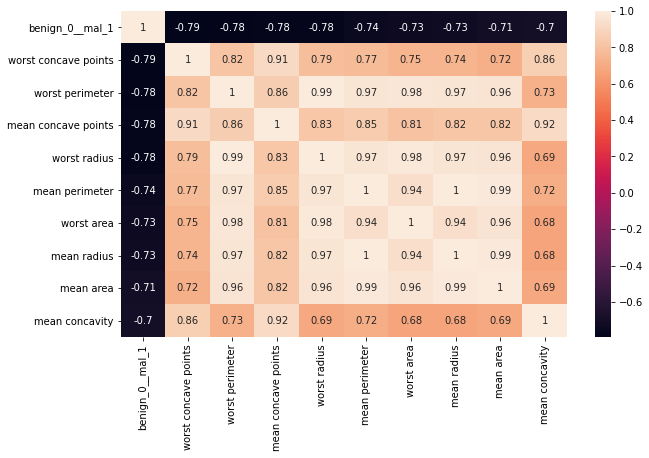

In [6]:
k = 10
plt.figure(figsize=(10,6))
cols = abs(df.corr()).sort_values('benign_0__mal_1', ascending=False).nlargest(k,'benign_0__mal_1').index
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm,annot=True,yticklabels=cols.values, xticklabels=cols.values)

#### Top 10 most correlated value both either negative or positive correlative against the classes viewed in heatmap.

<AxesSubplot:>

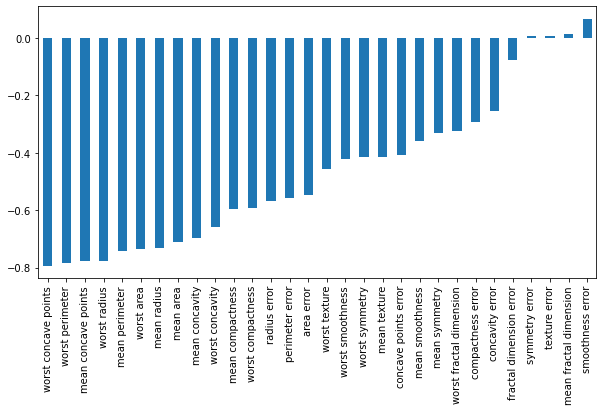

In [7]:
plt.figure(figsize=(10,5))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

#### Details of all feature of correlation, actually all majority feature has a negative correlation against the classification.

## 2. Data preparations and preprocessing

In [8]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Training Data

In [14]:
from tensorflow.keras.models import Sequential

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [15]:
from tensorflow.keras.layers import Dense,Dropout

In [16]:
X_train.shape

(426, 30)

#### Specify feature number with neuron models

In [17]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification using sigmoid activation
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 23s 53ms/sample - loss: 0.6759 - val_loss: 0.6556
Epoch 2/600
426/426 [==============================] - 0s 172us/sample - loss: 0.6438 - val_loss: 0.6192
Epoch 3/600
426/426 [==============================] - 0s 151us/sample - loss: 0.6072 - val_loss: 0.5780
Epoch 4/600
426/426 [==============================] - 0s 176us/sample - loss: 0.5661 - val_loss: 0.5358
Epoch 5/600
426/426 [==============================] - 0s 138us/sample - loss: 0.5245 - val_loss: 0.4910
Epoch 6/600
426/426 [==============================] - 0s 188us/sample - loss: 0.4801 - val_loss: 0.4453
Epoch 7/600
426/426 [==============================] - 0s 151us/sample - loss: 0.4358 - val_loss: 0.4030
Epoch 8/600
426/426 [==============================] - 0s 202us/sample - loss: 0.3978 - val_loss: 0.3618
Epoch 9/600
426/426 

Epoch 75/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0578 - val_loss: 0.1125
Epoch 76/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0604 - val_loss: 0.1153
Epoch 77/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0592 - val_loss: 0.1164
Epoch 78/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0583 - val_loss: 0.1153
Epoch 79/600
426/426 [==============================] - 0s 194us/sample - loss: 0.0559 - val_loss: 0.1178
Epoch 80/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0561 - val_loss: 0.1153
Epoch 81/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0558 - val_loss: 0.1167
Epoch 82/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0561 - val_loss: 0.1182
Epoch 83/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0551 - val_loss: 0.1143
Epoch 84/600
426/426 [========================

Epoch 152/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0485 - val_loss: 0.1283
Epoch 153/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0466 - val_loss: 0.1286
Epoch 154/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0480 - val_loss: 0.1293
Epoch 155/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0629 - val_loss: 0.1295
Epoch 156/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0520 - val_loss: 0.1259
Epoch 157/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0508 - val_loss: 0.1461
Epoch 158/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0467 - val_loss: 0.1289
Epoch 159/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0485 - val_loss: 0.1362
Epoch 160/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0469 - val_loss: 0.1328
Epoch 161/600
426/426 [==============

426/426 [==============================] - 0s 145us/sample - loss: 0.0471 - val_loss: 0.1426
Epoch 229/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0425 - val_loss: 0.1442
Epoch 230/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0438 - val_loss: 0.1548
Epoch 231/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0470 - val_loss: 0.1497
Epoch 232/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0432 - val_loss: 0.1578
Epoch 233/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0417 - val_loss: 0.1495
Epoch 234/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0419 - val_loss: 0.1541
Epoch 235/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0423 - val_loss: 0.1684
Epoch 236/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0426 - val_loss: 0.1474
Epoch 237/600
426/426 [============================

426/426 [==============================] - 0s 195us/sample - loss: 0.0392 - val_loss: 0.1666
Epoch 305/600
426/426 [==============================] - 0s 144us/sample - loss: 0.0528 - val_loss: 0.1701
Epoch 306/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0515 - val_loss: 0.1653
Epoch 307/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0490 - val_loss: 0.1648
Epoch 308/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0428 - val_loss: 0.1623
Epoch 309/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0400 - val_loss: 0.1618
Epoch 310/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0375 - val_loss: 0.1571
Epoch 311/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0379 - val_loss: 0.1648
Epoch 312/600
426/426 [==============================] - 0s 190us/sample - loss: 0.0389 - val_loss: 0.1717
Epoch 313/600
426/426 [============================

426/426 [==============================] - 0s 211us/sample - loss: 0.0365 - val_loss: 0.1727
Epoch 381/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0346 - val_loss: 0.1719
Epoch 382/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0350 - val_loss: 0.1858
Epoch 383/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0357 - val_loss: 0.1697
Epoch 384/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0349 - val_loss: 0.1782
Epoch 385/600
426/426 [==============================] - 0s 144us/sample - loss: 0.0362 - val_loss: 0.1867
Epoch 386/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0498 - val_loss: 0.1699
Epoch 387/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0397 - val_loss: 0.1729
Epoch 388/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0352 - val_loss: 0.1719
Epoch 389/600
426/426 [============================

426/426 [==============================] - 0s 165us/sample - loss: 0.0341 - val_loss: 0.1875
Epoch 457/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0334 - val_loss: 0.1835
Epoch 458/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0328 - val_loss: 0.1943
Epoch 459/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0321 - val_loss: 0.1959
Epoch 460/600
426/426 [==============================] - 0s 175us/sample - loss: 0.0328 - val_loss: 0.1880
Epoch 461/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0347 - val_loss: 0.1862
Epoch 462/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0328 - val_loss: 0.2076
Epoch 463/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0335 - val_loss: 0.1844
Epoch 464/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0428 - val_loss: 0.1996
Epoch 465/600
426/426 [============================

426/426 [==============================] - 0s 203us/sample - loss: 0.0309 - val_loss: 0.2026
Epoch 533/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0290 - val_loss: 0.2062
Epoch 534/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0289 - val_loss: 0.2055
Epoch 535/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0300 - val_loss: 0.2009
Epoch 536/600
426/426 [==============================] - 0s 182us/sample - loss: 0.0290 - val_loss: 0.2114
Epoch 537/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0297 - val_loss: 0.1995
Epoch 538/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0368 - val_loss: 0.1970
Epoch 539/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0276 - val_loss: 0.2234
Epoch 540/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0308 - val_loss: 0.1911
Epoch 541/600
426/426 [============================

In [19]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

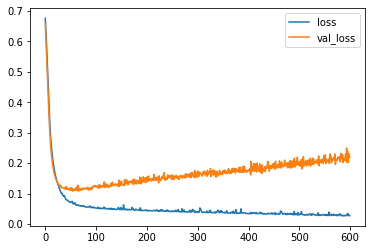

In [20]:
losses.plot()

#### This model is overfitting! Because we use 600 Epochs that is goning to be worse over and over time, therefore we want to use early stop before it gets out of hand as shown there.

## 4. Solving Overfitting (Callback and Dropout)

#### Recreate model and add callback

In [21]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification using sigmoid activation
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [24]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 949us/sample - loss: 0.6836 - val_loss: 0.6523
Epoch 2/600
426/426 [==============================] - 0s 156us/sample - loss: 0.6223 - val_loss: 0.5939
Epoch 3/600
426/426 [==============================] - 0s 169us/sample - loss: 0.5654 - val_loss: 0.5361
Epoch 4/600
426/426 [==============================] - 0s 176us/sample - loss: 0.5069 - val_loss: 0.4753
Epoch 5/600
426/426 [==============================] - 0s 175us/sample - loss: 0.4503 - val_loss: 0.4204
Epoch 6/600
426/426 [==============================] - 0s 182us/sample - loss: 0.4063 - val_loss: 0.3744
Epoch 7/600
426/426 [==============================] - 0s 167us/sample - loss: 0.3641 - val_loss: 0.3345
Epoch 8/600
426/426 [==============================] - 0s 162us/sample - loss: 0.3271 - val_loss: 0.2978
Epoch 9/600
426/426 [==============================] - 0s 157us/sample - loss: 0.2921 - val_loss: 0.2705
Epoch 10/

<AxesSubplot:>

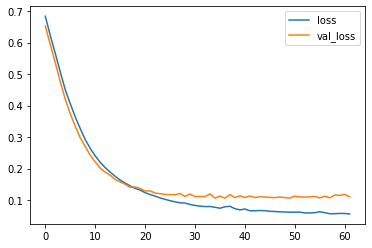

In [25]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

#### From plot we could avoid before overfitting occurs.

#### Recreate model and add Dropout Layer

#### Dropout Rate is randomly turning off neuron (around 0-1) if we put 0 it wll put off 0% of neuron randomly in opposite if 1 it will put 100% neuron randomly

In [26]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(rate=0.5))
# Binary Classification using sigmoid activation
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [27]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7283 - val_loss: 0.6839
Epoch 2/600
426/426 [==============================] - 0s 183us/sample - loss: 0.6959 - val_loss: 0.6678
Epoch 3/600
426/426 [==============================] - 0s 150us/sample - loss: 0.6719 - val_loss: 0.6539
Epoch 4/600
426/426 [==============================] - 0s 187us/sample - loss: 0.6589 - val_loss: 0.6378
Epoch 5/600
426/426 [==============================] - 0s 176us/sample - loss: 0.6397 - val_loss: 0.6205
Epoch 6/600
426/426 [==============================] - 0s 185us/sample - loss: 0.6440 - val_loss: 0.6040
Epoch 7/600
426/426 [==============================] - 0s 206us/sample - loss: 0.6117 - val_loss: 0.5835
Epoch 8/600
426/426 [==============================] - 0s 224us/sample - loss: 0.6074 - val_loss: 0.5617
Epoch 9/600
426/426 [==============================] - 0s 218us/sample - loss: 0.5778 - val_loss: 0.5295
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 195us/sample - loss: 0.1370 - val_loss: 0.0852
Epoch 79/600
426/426 [==============================] - 0s 159us/sample - loss: 0.1330 - val_loss: 0.0934
Epoch 80/600
426/426 [==============================] - 0s 149us/sample - loss: 0.1284 - val_loss: 0.0885
Epoch 81/600
426/426 [==============================] - 0s 166us/sample - loss: 0.1303 - val_loss: 0.0855
Epoch 82/600
426/426 [==============================] - 0s 146us/sample - loss: 0.1181 - val_loss: 0.0867
Epoch 83/600
426/426 [==============================] - 0s 157us/sample - loss: 0.1092 - val_loss: 0.0854
Epoch 84/600
426/426 [==============================] - 0s 159us/sample - loss: 0.1199 - val_loss: 0.0906
Epoch 85/600
426/426 [==============================] - 0s 159us/sample - loss: 0.1203 - val_loss: 0.0808
Epoch 86/600
426/426 [==============================] - 0s 150us/sample - loss: 0.1271 - val_loss: 0.0896
Epoch 87/600
426/426 [========================

In [28]:
mode_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

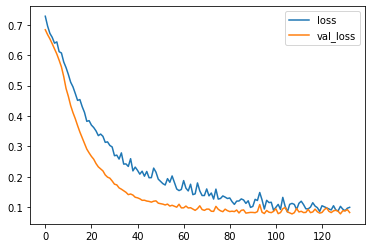

In [34]:
mode_loss.plot()

In [30]:
pred = model.predict_classes(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

#### Predictions against Ground truth label

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [33]:
print(confusion_matrix(y_test,pred))

[[54  1]
 [ 3 85]]
